<a href="https://colab.research.google.com/github/Ceerogreen/assignment3/blob/main/assignment_knn_and_kmc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 3: $k$ Nearest Neighbor and $k$ Means Clustering

## **Do three questions.**

`! git clone https://www.github.com/DS3001/assignment3`

**Q1.** This question is a case study for $k$ nearest neighbor. The target variable `y` is `Purchase` and the features of interest are `Age` and `AnnualSalary`.

1. Load the `./data/car_data.csv` data. Look at the head and dimensions of the data.
2. Summarize the variables (`User.ID`, `Gender`, `Age`, `AnnualSalary`, `Purchase`). Are there any missings to clean? Convert the `Gender` categorical variable into a dummy variable that takes the value 0 for male and 1 for female. Create a matrix $X$ of predictors including `Age` and `AnnualSalary`, and an outcome $y$ equaling `Purchase`.
3. MaxMin-normalize `Age` and `AnnualSalary` in `X`.
4. Split the sample into a ~80% training dataset and a ~20% testing dataset.
5. Treat this as a classification problem: The model is supposed to predict 0 or 1 for each customer, classifying them as a purchaser or non-purchaser. Use sklearn to determine the optimal number of neighbors $k$ to use.
6. Run the model for the optimal number of neighbors on the testing data. Cross tabulate the predicted outcomes against the actual outcomes; this is called a **confusion matrix**. How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?
7. Now, compute confusion matrices separately for men and women, as in part 6. Does the model make more accurate predictions for one sex or the other? Explain. (Performance of algorithms on population subgroups is a growing topic in data science.)

In [1]:
! git clone https://github.com/Ceerogreen/assignment3

fatal: destination path 'assignment3' already exists and is not an empty directory.


In [2]:
import pandas as pd
import numpy as np
cars = pd.read_csv('/content/assignment3/data/car_data.csv')
print(cars.shape)
cars.head()

(1000, 5)


,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [3]:
cars.describe()
cars['Gender'].describe()
# No missing data, all 1000 rows have values in them
gender = pd.get_dummies(cars,columns=['Gender'])

In [4]:
cars['Gender'] = gender['Gender_Female']
X = cars.loc[:,['Age','AnnualSalary']]
y = cars['Purchased']

In [5]:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

X2 = X.apply(maxmin)
X2

,Age,AnnualSalary
0,0.377778,0.036364
1,0.488889,0.207273
2,0.688889,0.429091
3,0.488889,0.672727
4,0.155556,0.465455
...,...,...
995,0.444444,0.320000
996,0.644444,0.061818
997,0.222222,0.898182
998,0.666667,0.865455


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2,y,test_size=.2,random_state=100)

from sklearn.neighbors import KNeighborsClassifier as kNNClassifier

k_bar = 70
k_grid = np.arange(1,k_bar)
SSE_train = np.zeros(k_bar)
SSE_test = np.zeros(k_bar)
for k in range(k_bar):
    model = kNNClassifier(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE_test[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
    y_hat = fitted_model.predict(X_train) # Predict values for training set
    SSE_train[k] = np.sum( (y_train-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE_test) # Lowest recorded SSE
min_index = np.where(SSE_test==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print(k_star)

[44 45]


In [7]:
model = kNNClassifier(n_neighbors=44)
fitted_model = model.fit(X_train,y_train)
test_data = model.predict(X_test)
print(y_test)
pd.crosstab(test_data,y_test)
# There are 13 instances of the model predicting a sale when there was none, and 3 instances of the model predicting no sale when there was one
# 184 out of 200 (92%) of predictions were correct, making it a very good but not perfect model

249    1
353    0
537    1
424    1
564    1
      ..
684    0
644    1
110    1
28     1
804    0
Name: Purchased, Length: 200, dtype: int64


Purchased,0,1
row_0,,
0,106,3
1,13,78


In [8]:
women = cars[cars['Gender'] == 1]
men = cars[cars['Gender'] == 0]

X = women.loc[:,['Age','AnnualSalary']]
y = women['Purchased']

X2 = X.apply(maxmin)
X2

X_train, X_test, y_train, y_test = train_test_split(X2,y,test_size=.2,random_state=100)
model = kNNClassifier(n_neighbors=44)
fitted_model = model.fit(X_train,y_train)
test_data = model.predict(X_test)
print(pd.crosstab(test_data,y_test))

X = men.loc[:,['Age','AnnualSalary']]
y = men['Purchased']

X2 = X.apply(maxmin)
X2

X_train, X_test, y_train, y_test = train_test_split(X2,y,test_size=.2,random_state=100)
model = kNNClassifier(n_neighbors=44)
fitted_model = model.fit(X_train,y_train)
test_data = model.predict(X_test)
print(pd.crosstab(test_data,y_test))


# The data is slightly worse for women than it is for men (0.89 vs 0.94 accuracy). Its unclear why this is, probably because the training goes
# more by what works well for the less studied group which in this case is men? Though I'm not really sure and this is just a conjecture

Purchased   0   1
row_0            
0          56   3
1           8  37
Purchased   0   1
row_0            
0          59   3
1           3  32


**Q2.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm for regression and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [9]:
newcars = pd.read_csv('/content/assignment3/data/USA_cars_datasets.csv')
newcars = newcars.loc[:,['price','year','mileage']]
newcars.isnull().values.any() # no nans
newcars.shape
newcars.head()

,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [10]:
X = newcars.loc[:,['year','mileage']]
y = newcars['price']
X.apply(maxmin)

,year,mileage
0,0.744681,0.269287
1,0.808511,0.187194
2,0.957447,0.038892
3,0.872340,0.063016
4,0.957447,0.006537
...,...,...
2494,0.978723,0.023193
2495,0.957447,0.033944
2496,0.957447,0.031037
2497,0.957447,0.031983


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

Text(0.5, 1.0, 'k = 300')

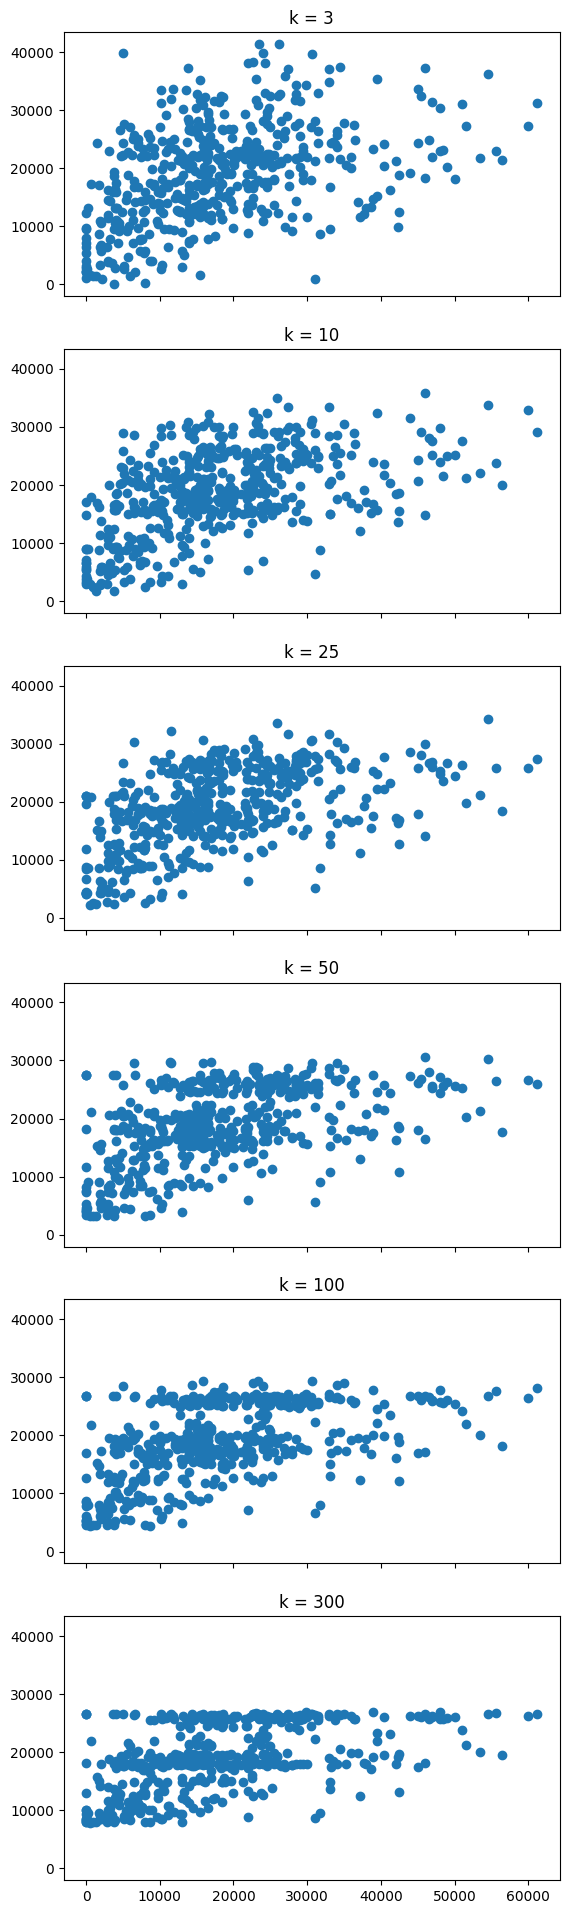

In [12]:
from sklearn.neighbors import KNeighborsRegressor as kNNRegression
import matplotlib.pyplot as plt

klist = [3,10,25,50,100,300]
SSE_train = [0,0,0,0,0,0]
SSE_test = [0,0,0,0,0,0]
y_hats = [0,0,0,0,0,0]
i=0
for k in klist:
  model = kNNRegression(n_neighbors=k+1) # Create a sk model for k
  fitted_model = model.fit(X_train,y_train) # Train the model on our data
  y_hat = fitted_model.predict(X_test) # Predict values for test set
  SSE_test[i] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
  y_hats[i] = y_hat
  y_hat = fitted_model.predict(X_train) # Predict values for training set
  SSE_train[i] = np.sum( (y_train-y_hat)**2 ) # Save the computed SSE
  i = i + 1

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6,sharex='col',sharey='col')
fig.set_figheight(24)

ax1.scatter(y_test,y_hats[0])
ax1.set_title('k = 3')
ax2.scatter(y_test,y_hats[1])
ax2.set_title('k = 10')
ax3.scatter(y_test,y_hats[2])
ax3.set_title('k = 25')
ax4.scatter(y_test,y_hats[3])
ax4.set_title('k = 50')
ax5.scatter(y_test,y_hats[4])
ax5.set_title('k = 100')
ax6.scatter(y_test,y_hats[5])
ax6.set_title('k = 300')
# These graphs don't make it super easy, they don't seem to have too much easily noticeable difference to the human eye

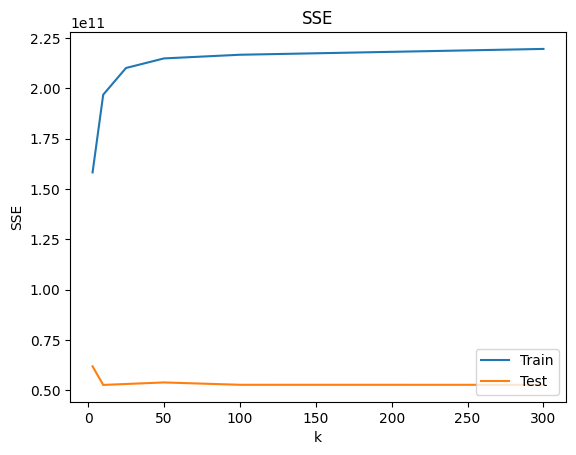

In [13]:
plt.plot(klist,SSE_train,label='Train') # Plot SSE by k
plt.plot(klist,SSE_test,label='Test') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')
plt.title('SSE')
plt.show()
# As k increases past 10, there really doesn't seem to be much of a change in the test SSE; it takes until 30 for this to be the case for
# the train SSE.

In [14]:
k_bar = 70
k_grid = np.arange(1,k_bar)
SSE_train = np.zeros(k_bar)
SSE_test = np.zeros(k_bar)
for k in range(k_bar):
    model = kNNRegression(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE_test[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
    y_hat = fitted_model.predict(X_train) # Predict values for training set
    SSE_train[k] = np.sum( (y_train-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE_test) # Lowest recorded SSE
min_index = np.where(SSE_test==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print(k_star)

[12]


In [15]:
# At too low of a K value, there was underfitting; you can tell where there are outliers in the training data causing guesses that are way
# too large for the training data. As the K gets too large, you can see the overfitting; there are distinct lines of values being predicted,
# causing all of the data to be pulled too close to the middle areas of the graph as opposed to the proper values

**Q3.** This question is a case study for $k$ nearest neighbor, particularly variable selection. The data for the question include (summaries reproduced here directly from the codebook):

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables better, in this case? Explain your findings.

**Q4.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

**Q5.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

In [16]:
airbnb = pd.read_csv('/content/assignment3/data/airbnb_hw.csv')
airbnb['Price'].replace(to_replace='', value=np.nan, inplace=True)
airbnb['Price'] = airbnb['Price'].str.replace(',','')
airbnb['Price'] = airbnb['Price'].astype(int)
# Beds, Number Of Reviews and Review Scores Rating are all floats or ints, and are clean. They do have
# nans, see next cell
airbnb.head(10)

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0
5,1039,7/25/2008,Big Greenpoint 1BD w/ Skyline View,Brooklyn,Apartment,100.0,Entire home/apt,11222.0,1.0,1,4,149,100.0
6,1783,8/12/2008,Amazing Also,Manhattan,Apartment,100.0,Entire home/apt,10004.0,1.0,1,9,250,100.0
7,2078,8/15/2008,"Colorful, quiet, & near the subway!",Brooklyn,Apartment,90.0,Private room,11201.0,1.0,1,80,90,94.0
8,2339,8/20/2008,East Village Cocoon: 2 Bedroom Flat,Manhattan,Apartment,90.0,Entire home/apt,10009.0,2.0,1,95,270,90.0
9,2339,8/20/2008,Lovely 2 Bedroom East Village Nest,Manhattan,Apartment,95.0,Entire home/apt,10009.0,2.0,1,23,290,96.0


In [17]:
airbnb = airbnb[['Price','Beds','Number Of Reviews','Review Scores Rating']]
airbnb.dropna(inplace=True)
airbnb = airbnb.loc[:,['Beds','Number Of Reviews','Review Scores Rating','Price']]
print(airbnb['Review Scores Rating'].unique())
X = airbnb.loc[:,['Beds','Number Of Reviews','Review Scores Rating']]
y = airbnb['Price']
X.apply(maxmin)

<ipython-input-17-27f50ef17c42>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb.dropna(inplace=True)


[ 96. 100.  94.  90.  98.  93.  91.  97.  95.  99.  85.  86.  80.  88.
  92.  89.  82.  87.  81.  76.  78.  83.  66.  84.  72.  79.  60.  40.
  62.  74.  77.  50.  71.  75.  73.  69.  65.  68.  70.  67.  64.  20.
  57.  58.  43.  63.  55.  47.  53.  49.  30.]


,Beds,Number Of Reviews,Review Scores Rating
4,0.1875,0.148438,0.950
5,0.0625,0.011719,1.000
6,0.0625,0.031250,1.000
7,0.0625,0.308594,0.925
8,0.1250,0.367188,0.875
...,...,...,...
30332,0.0625,0.000000,1.000
30347,0.0625,0.000000,0.750
30378,0.0625,0.000000,1.000
30404,0.0625,0.000000,1.000


In [18]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=6, n_init = 10, random_state=0)
model = model.fit(X)
airbnb['g_hat'] = model.predict(X)

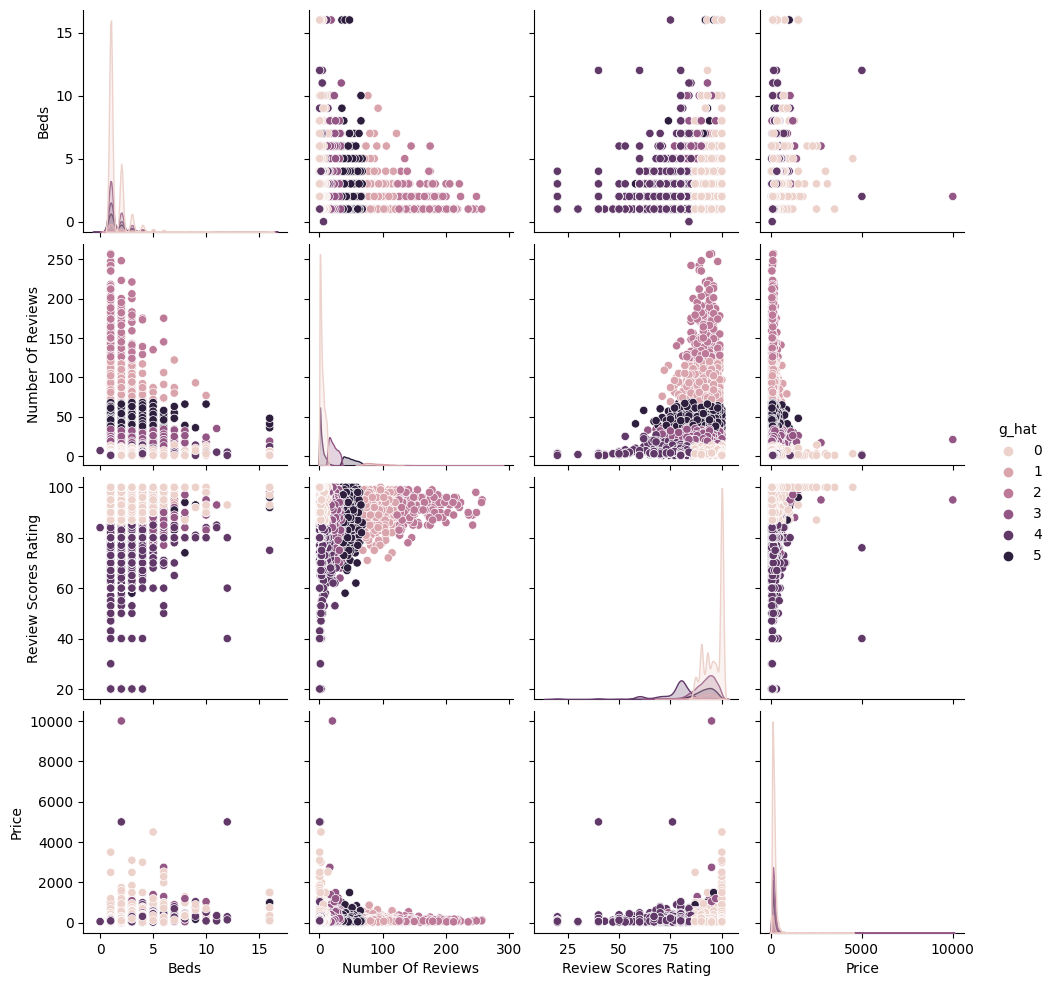

In [19]:
import seaborn as sns
sns.pairplot(data=airbnb,hue='g_hat')

In [20]:
airbnb.groupby(['g_hat']).describe()
# Clusters 0 and 3 have the highest mean price

Beds                                                \
         count      mean       std  min  25%  50%  75%   max   
g_hat                                                          
0      11970.0  1.489390  0.969118  1.0  1.0  1.0  2.0  16.0   
1        819.0  1.593407  1.014326  1.0  1.0  1.0  2.0  10.0   
2        184.0  1.576087  0.949359  1.0  1.0  1.0  2.0   6.0   
3       4226.0  1.619262  1.067252  1.0  1.0  1.0  2.0  16.0   
4       2911.0  1.654758  1.190459  0.0  1.0  1.0  2.0  16.0   
5       2001.0  1.683158  1.179645  1.0  1.0  1.0  2.0  16.0   

      Number Of Reviews              ... Review Scores Rating           Price  \
                  count        mean  ...                  75%    max    count   
g_hat                                ...                                        
0               11970.0    4.877444  ...                100.0  100.0  11970.0   
1                 819.0   88.899878  ...                 95.0  100.0    819.0   
2                 184.0  156.842391  ...                 95.0   99.0    184.0   
3                4226.0   22.423568  ...                 96.0  100.0   4226.0   
4                2911.0    4.469942  ...                 80.0   85.0   2911.0   
5                2001.0   48.735132  ...                 95.0  100.0   2001.0   

                                                                   
             mean         std   min   25%    50%     75%      max  
g_hat                                                              
0      159.198329  138.114213  10.0  85.0  130.0  195.00   4500.0  
1      135.700855   84.884185  27.0  82.0  115.0  165.00    875.0  
2      125.000000   70.377126  33.0  78.0  100.0  161.25    550.0  
3      162.071936  193.859246  20.0  89.0  135.0  195.00  10000.0  
4      138.500859  161.064284  21.0  70.0  105.0  170.00   5000.0  
5      147.385807   97.534830  22.0  89.0  125.0  180.00   1500.0  

[6 rows x 32 columns]

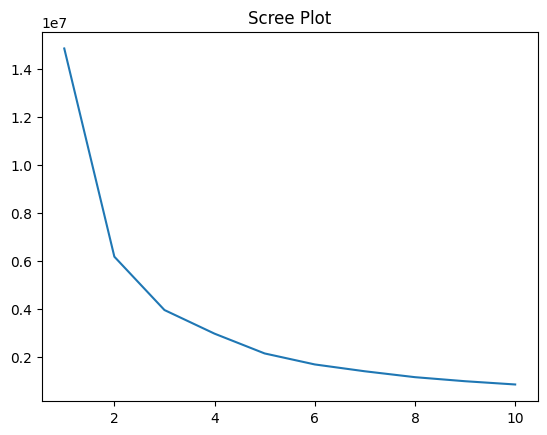

In [21]:
k_bar = 10
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(X)
    SSE[k] = model.inertia_

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')

# Its not super easy to determine, but I'd say that k=3 is the best k; It continues to go down linearly
# past that point with a slope closer to 0 than -1. Arguments could be made for a slightly larger k

Beds                                                \
         count      mean       std  min  25%  50%  75%   max   
g_hat                                                          
0      17572.0  1.531812  1.024575  0.0  1.0  1.0  2.0  16.0   
1       3695.0  1.677943  1.135483  1.0  1.0  1.0  2.0  16.0   
2        844.0  1.580569  0.989579  1.0  1.0  1.0  2.0  10.0   

      Number Of Reviews              ... Review Scores Rating           Price  \
                  count        mean  ...                  75%    max    count   
g_hat                                ...                                        
0               17572.0    6.877305  ...                100.0  100.0  17572.0   
1                3695.0   41.719080  ...                 95.0  100.0   3695.0   
2                 844.0  107.042654  ...                 95.0  100.0    844.0   

                                                                  
             mean         std   min   25%    50%    75%      max  
g_hat                                                             
0      156.410141  158.618429  10.0  85.0  128.0  192.0  10000.0  
1      152.037348  106.474051  22.0  89.0  125.0  185.0   1500.0  
2      133.337678   82.879028  27.0  80.0  110.0  165.0    875.0  

[3 rows x 32 columns]

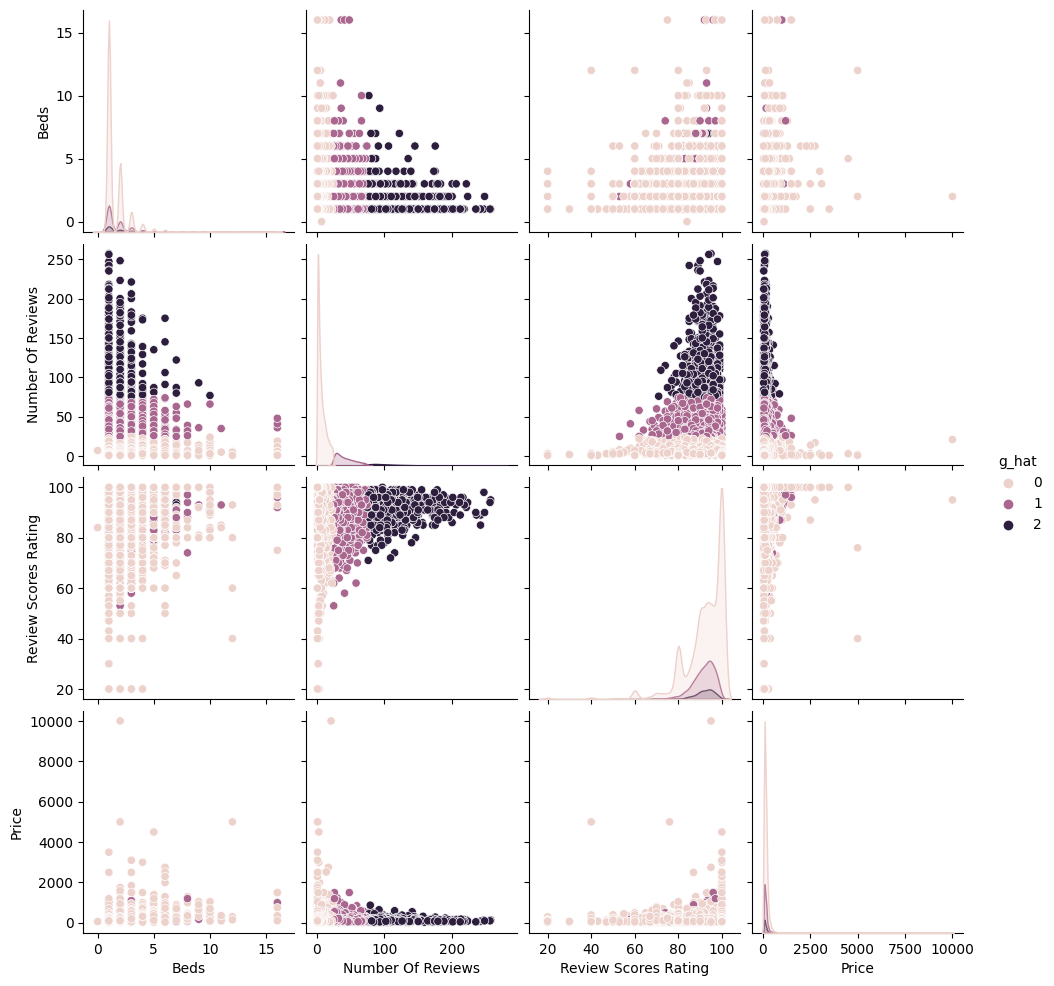

In [22]:
model = KMeans(n_clusters=3, n_init = 10, random_state=0)
model = model.fit(X)
airbnb['g_hat'] = model.predict(X)
sns.pairplot(data=airbnb,hue='g_hat')
airbnb.groupby(['g_hat']).describe()
# Group 0 here has the highest mean price

**Q6.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,1,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,1,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,1,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

**Q7.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?